In [1]:
from create_model import load_and_process_X, DataSet, Statistics, load_and_process_y

df_X = load_and_process_X(DataSet.EURO26, 100, [Statistics.SUM])
df_y = load_and_process_y(DataSet.EURO26, 100)

2024-01-08 11:37:12,385 - INFO - Finished loading DataSet.EURO26 with 100 files and 1 statistics
2024-01-08 11:37:12,540 - INFO - Finished loading DataSet.EURO26 with 100 files


In [2]:
from create_model import evaluate_models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

random_state = 41

base_models = [
    KNeighborsRegressor(n_neighbors=3),
    KNeighborsRegressor(n_neighbors=7),
    SVR(),
    DecisionTreeRegressor(random_state=random_state),
    RandomForestRegressor(random_state=random_state),
    GradientBoostingRegressor(random_state=random_state),
    AdaBoostRegressor(random_state=random_state),
    Lasso(random_state=random_state),
    Ridge(random_state=random_state),
    ElasticNet(random_state=random_state),
]

base_metrics_df = evaluate_models(base_models, df_X, df_y.values.ravel(), random_state=random_state, use_pca=False)
pca_metrics_df = evaluate_models(base_models, df_X, df_y.values.ravel(), random_state=random_state, use_pca=True, n_components=0.90)

# Display the DataFrames
print("Base Model Metrics:")
print(base_metrics_df)
print("\nPCA Model Metrics:")
print(pca_metrics_df)

2024-01-08 11:37:38,739 - INFO - Finished evaluating KNeighborsRegressor (n_neighbors=3)
2024-01-08 11:37:39,183 - INFO - Finished evaluating KNeighborsRegressor (n_neighbors=7)
2024-01-08 11:37:43,204 - INFO - Finished evaluating SVR
2024-01-08 11:37:45,714 - INFO - Finished evaluating DecisionTreeRegressor
2024-01-08 11:40:10,574 - INFO - Finished evaluating RandomForestRegressor
2024-01-08 11:41:31,131 - INFO - Finished evaluating GradientBoostingRegressor
2024-01-08 11:41:57,042 - INFO - Finished evaluating AdaBoostRegressor
2024-01-08 11:41:58,302 - INFO - Finished evaluating Lasso
2024-01-08 11:41:59,159 - INFO - Finished evaluating Ridge
/home/rrodak/studia/magister/2_semestr/ML/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e+05, tolerance: 5.931e+03
  mod

Base Model Metrics:
                                 Model  R^2 score    MSE score  MAR score
0  KNeighborsRegressor (n_neighbors=3)   0.996005   208.754419   8.628594
1  KNeighborsRegressor (n_neighbors=7)   0.992842   373.921053  10.898227
2                                  SVR   0.893229  5587.737136  46.595344
3                DecisionTreeRegressor   0.997130   149.989952   6.650200
4                RandomForestRegressor   0.997776   116.216615   6.260474
5            GradientBoostingRegressor   0.997994   104.854306   7.314527
6                    AdaBoostRegressor   0.995745   222.563863  11.557449
7                                Lasso   0.980012  1044.881492  27.490825
8                                Ridge   0.980393  1025.068837  27.224726
9                           ElasticNet   0.974889  1312.721539  29.624579

PCA Model Metrics:
                                 Model  R^2 score    MSE score  MAR score
0  KNeighborsRegressor (n_neighbors=3)   0.963060  1929.520982  20.16534

2024-01-08 11:42:30,455 - INFO - Processing the 1 dataset
2024-01-08 11:42:30,600 - INFO - Finished loading DataSet.EURO26 with 1 files and 2 statistics
2024-01-08 11:42:30,604 - INFO - Finished loading DataSet.EURO26 with 1 files
2024-01-08 11:42:30,749 - INFO - Finished evaluating KNeighborsRegressor (n_neighbors=3)
2024-01-08 11:42:30,912 - INFO - Finished evaluating KNeighborsRegressor (n_neighbors=7)
2024-01-08 11:42:31,054 - INFO - Finished evaluating SVR
2024-01-08 11:42:31,223 - INFO - Finished evaluating DecisionTreeRegressor
2024-01-08 11:42:32,584 - INFO - Finished evaluating RandomForestRegressor
2024-01-08 11:42:33,068 - INFO - Finished evaluating GradientBoostingRegressor
2024-01-08 11:42:33,752 - INFO - Finished evaluating AdaBoostRegressor
2024-01-08 11:42:33,903 - INFO - Finished evaluating Lasso
2024-01-08 11:42:34,051 - INFO - Finished evaluating Ridge
2024-01-08 11:42:34,187 - INFO - Finished evaluating ElasticNet
2024-01-08 11:42:34,188 - INFO - Processing the 2 da

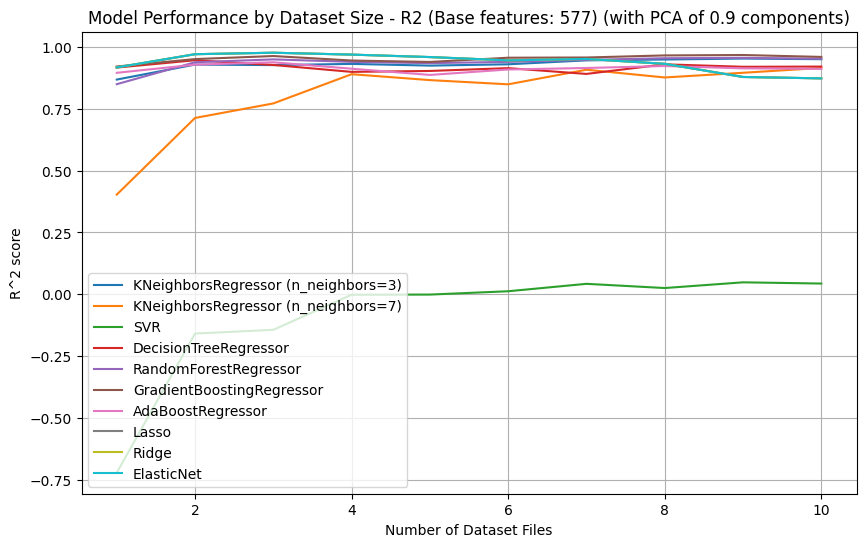

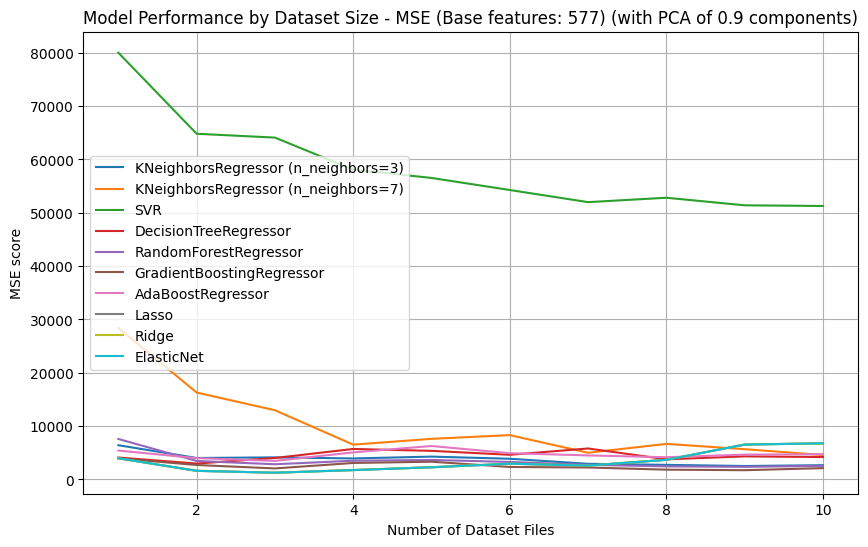

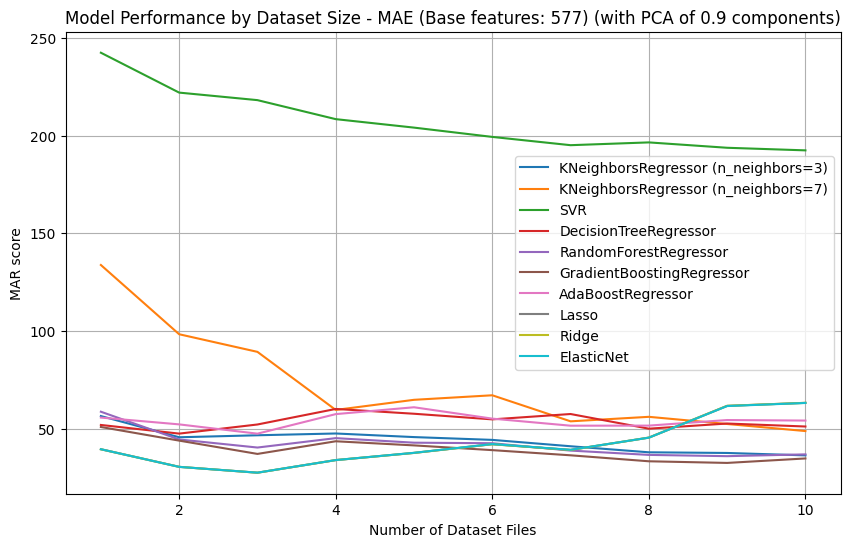

In [3]:
from create_model import plot_metrics_by_dataset_size

plot_metrics_by_dataset_size(DataSet.EURO26, base_models, 10, [Statistics.SUM, Statistics.MIN], 42, True, 0.90,
                                 None)

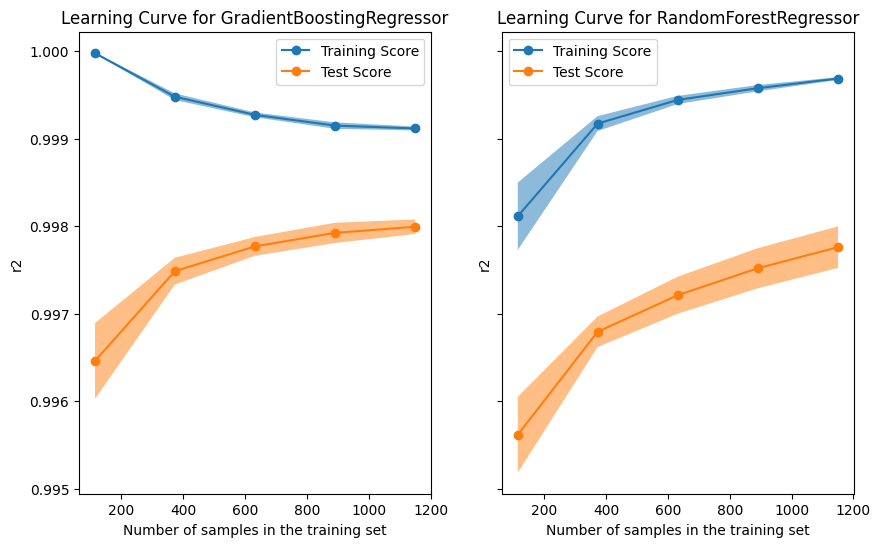

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, RepeatedKFold

common_params = {
    "X": df_X,
    "y": df_y.values.ravel(),
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": RepeatedKFold(n_splits=2, n_repeats=5, random_state=random_state),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "r2",
}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

for ax_idx, estimator in enumerate([GradientBoostingRegressor(random_state=random_state), RandomForestRegressor(random_state=random_state)]):
    model_name = type(estimator).__name__
    if hasattr(estimator, 'n_neighbors'):
        model_name += f" (n_neighbors={estimator.n_neighbors})"
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {model_name}")